In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
# Load the dataset without attempting to parse dates
df = pd.read_csv('weather_data1.csv')
df


,Temperature,Pressure,Humidity,Description,Wind Speed,Timestamp
0,30.0,1003,69,moderate rain,2.96,2024-07-22T10:34:03.553873
1,30.0,1003,69,moderate rain,2.96,2024-07-22T10:35:03.688866
2,30.0,1003,69,moderate rain,2.96,2024-07-22T10:36:03.819522
3,30.0,1003,70,moderate rain,3.56,2024-07-22T10:37:03.961010
4,30.0,1003,70,moderate rain,3.56,2024-07-22T10:38:04.093865
...,...,...,...,...,...,...
750,29.0,999,89,moderate rain,2.87,2024-07-22T23:56:46.301719
751,29.0,999,89,moderate rain,2.87,2024-07-22T23:57:46.443791
752,29.0,999,89,moderate rain,2.87,2024-07-22T23:58:46.588069
753,29.0,999,89,moderate rain,2.87,2024-07-22T23:59:46.728007


In [17]:
data = df[['Humidity']].values  # Use .values to ensure 'data' is a NumPy array, required for the next steps
data


array([[69],
       [69],
       [69],
       [70],
       [70],
       [70],
       [70],
       [70],
       [70],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],
       [69],

In [18]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [19]:
# Function to create sequences for LSTM model
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data)-sequence_length-1):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [20]:
# Prepare the data
sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

c:\Users\Windows\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
#Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_split=0.1, verbose=1)

# Predicting and inverse transforming the predictions
predicted_temperature = model.predict(X_test)
predicted_temperature = scaler.inverse_transform(predicted_temperature)

# Inverse transform the actual temperature for comparison
actual_temperature = scaler.inverse_transform(y_test.reshape(-1, 1))



Epoch 1/1000


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.2023 - val_loss: 0.0573
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0360 - val_loss: 0.0205
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0188 - val_loss: 0.0081
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0067 - val_loss: 0.0074
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0066 - val_loss: 0.0075
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0053 - val_loss: 0.0075
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0040 - val_loss: 0.0075
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0064 - val_loss: 0.0075
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0051 - val_loss: 0.0074
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0054 - val_los

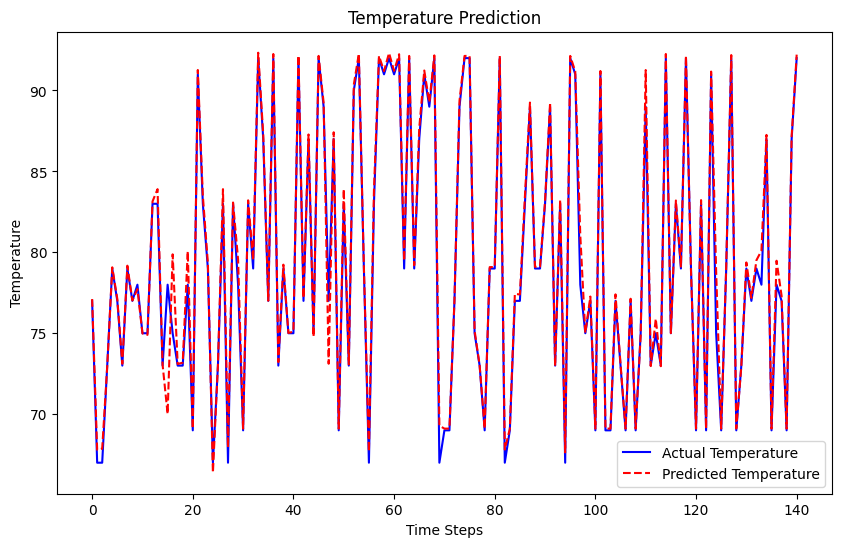

In [25]:
# Visualization
plt.figure(figsize=(10,6))
plt.plot(actual_temperature, color='blue', label='Actual Temperature')
plt.plot(predicted_temperature, color='red', linestyle='--', label='Predicted Temperature')
plt.title('Temperature Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

errors = np.abs(predicted_temperature - actual_temperature)

mse = mean_squared_error(actual_temperature, predicted_temperature)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

threshold = 1
errors = np.abs(predicted_temperature - actual_temperature)
percentage_within_threshold = np.mean(errors <= threshold) * 100

print(f"Percentage of Predictions within {threshold}°C: {percentage_within_threshold:.2f}%")



Mean Squared Error (MSE): 1.16
Root Mean Squared Error (RMSE): 1.08
Percentage of Predictions within 1°C: 92.20%


In [27]:
# Dự đoán và chuyển đổi dữ liệu về định dạng gốc
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

y_train_true = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true = scaler.inverse_transform(y_test.reshape(-1, 1))

threshold = 1

train_errors = np.abs(y_train_pred - y_train_true)
test_errors = np.abs(y_test_pred - y_test_true)

train_correct = np.sum(train_errors <= threshold)
test_correct = np.sum(test_errors <= threshold)

percentage_train_correct = (train_correct / len(y_train_true)) * 100
percentage_test_correct = (test_correct / len(y_test_true)) * 100

print(f"Percentage of Training Predictions within {threshold}°C: {percentage_train_correct:.2f}%")
print(f"Percentage of Test Predictions within {threshold}°C: {percentage_test_correct:.2f}%")
    

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Percentage of Training Predictions within 1°C: 94.32%
Percentage of Test Predictions within 1°C: 92.20%


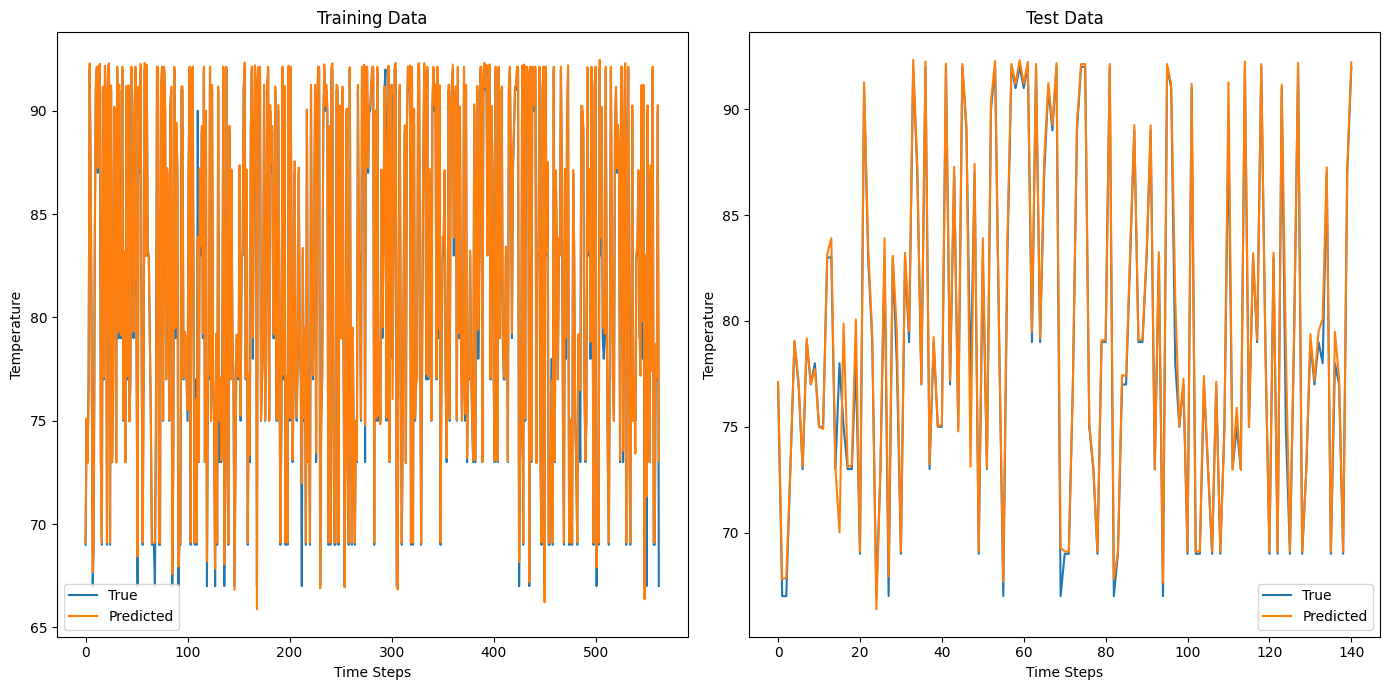

In [28]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(len(y_train_true)), y_train_true, label='True')
plt.plot(range(len(y_train_pred)), y_train_pred, label='Predicted')
plt.title('Training Data')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(y_test_true)), y_test_true, label='True')
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted')
plt.title('Test Data')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()
